# Graphs

In [1]:
%run helper.py

## Using networkx (pure python)

In [2]:
import networkx as nx

In [3]:
G = nx.ring_of_cliques(3,4)
np.random.seed(42)
pos = nx.kamada_kawai_layout(G)

In [4]:
colors = [cc.glasbey_hv[0]]*4 + [cc.glasbey_hv[1]]*4 + [cc.glasbey_hv[2]]*4

### Point-and-Line Diagram

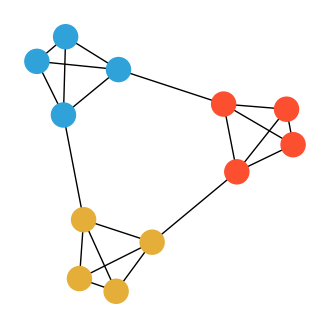

In [5]:
fig, ax = plt.subplots(figsize=(4,4))
nx.draw_networkx(G, node_color=colors, with_labels=False)
ax.set_axis_off()
plt.savefig("../figures/graph_ring-of-cliques.pdf", transparent=True, bbox_inches="tight")

### Adjacency matrix

Note that the use of `clustermap` here is due to its support for `row_colors` and `col_colors` only; 
we do not perform any clustering. 

In [6]:
A = nx.adjacency_matrix(G).todense()

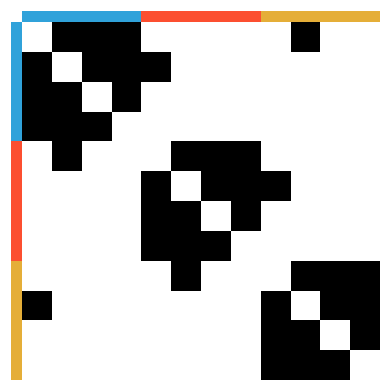

In [7]:
fig = sns.clustermap(nx.adjacency_matrix(G).todense(), 
               row_cluster=False, col_cluster=False, dendrogram_ratio=0.001,
               figsize=(4,4), xticklabels=0, yticklabels=0, cmap='Grays',
                row_colors=colors, col_colors=colors
                    )
fig.ax_cbar.remove()
fig.savefig("../figures/graph_ring-of-cliques_adj.pdf", transparent=True, bbox_inches="tight")

### How visualization shapes interpretation

In [8]:
G = nx.complete_graph(4)
pos1 = {0:(0,0), 1:(0,1), 2:(1,0), 3:(1,1)}
pos2 = {0:(0,0), 1:(1,0), 2:(0.5,0.25), 3:(0.5,0.65)}
pos3 = {0:(0,0), 1:(0.2,0), 2:(0.4,0), 3:(0.6,0)}

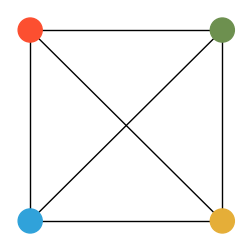

In [9]:
fig, ax = plt.subplots(figsize=(3,3))
nx.draw_networkx(G, node_color=cc.glasbey_hv[:4], with_labels=False, pos=pos1)
ax.set_axis_off()
plt.savefig("../figures/graph_k4_layout1.pdf", transparent=True, bbox_inches="tight")

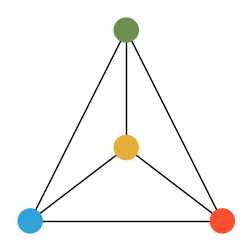

In [10]:
fig, ax = plt.subplots(figsize=(3,3))
nx.draw_networkx(G, node_color=cc.glasbey_hv[:4], with_labels=False, pos=pos2)
ax.set_axis_off()
plt.savefig("../figures/graph_k4_layout2.pdf", transparent=True, bbox_inches="tight")

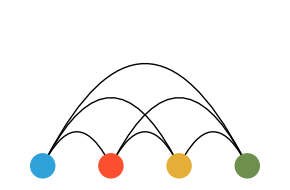

In [11]:
fig, ax = plt.subplots(figsize=(3,2))
nx.draw_networkx_nodes(G, node_color=cc.glasbey_hv[:4], pos=pos3, margins=0.1)
nx.draw_networkx_edges(G, pos=pos3, connectionstyle="arc3,rad=-1", arrows=True)
ax.set_axis_off()
plt.tight_layout()
plt.savefig("../figures/graph_k4_layout3.pdf", transparent=True, bbox_inches="tight")

### Karate-Club Examples

Note that the Kamada-Kawai computes a distance matrix from the adjacency matrix, where edge weights are treated as _costs_. 
Therefore, we need to "invert" the edge weights to obtain the desired behavior. 
In contrast, Fruchterman-Reingold seeks to place nodes with larger edge weights closer together, 
so using the existing edge weights as-is creates the intended effect for this layout. 

In [12]:
G = nx.karate_club_graph()
nx.set_edge_attributes(G, {(u,v):1/w for u,v,w in G.edges(data="weight")}, "inv_weight")

In [13]:
np.random.seed(42)
pos1 = nx.kamada_kawai_layout(G, weight="inv_weight") 
pos2 = nx.fruchterman_reingold_layout(G, weight="weight")
pos3 = nx.random_layout(G)

In [14]:
clubs = sorted({v for k,v in G.nodes(data="club")})
node_colors = [cc.glasbey_hv[clubs.index(v)] for _, v in G.nodes(data="club")]

In [15]:
edge_weights = [0.5 * w for u,v,w in G.edges(data="weight")]

#### Kamada-Kawai

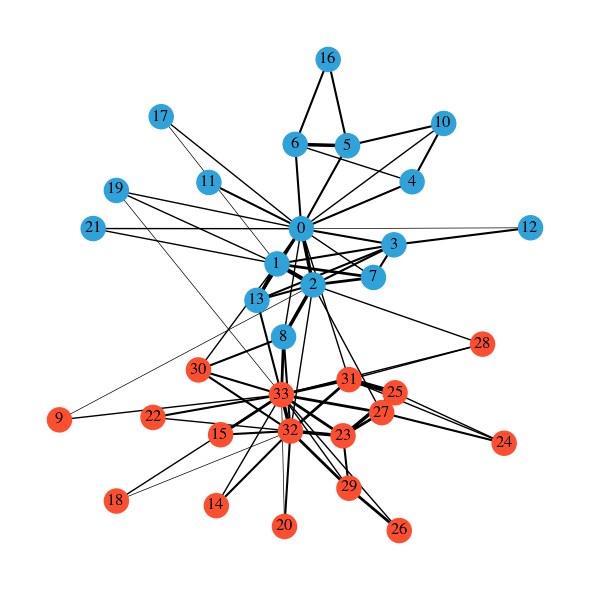

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
nx.draw_networkx(G, pos=pos1, node_color=node_colors, width=edge_weights)
ax.set_axis_off()
plt.tight_layout()
plt.savefig("../figures/graph_karate_kk.pdf", transparent=True, bbox_inches="tight")

#### A note on the Kamada-Kawai implementation in networkx
The networkx implementation of the Kamada-Kawai layout is made "deterministic" by using the circular layout under the hood unless you pass different starting coordinates. Compare the image above to the alternatives below.

In [17]:
np.random.seed(42)
pos1_kk_start = nx.fruchterman_reingold_layout(G, weight="weight")
pos1_kk = nx.kamada_kawai_layout(G, pos=pos1_kk_start, weight="inv_weight") 
np.random.seed(41)
pos2_kk_start = nx.fruchterman_reingold_layout(G, weight="weight")
pos2_kk = nx.kamada_kawai_layout(G, pos=pos2_kk_start, weight="inv_weight") 

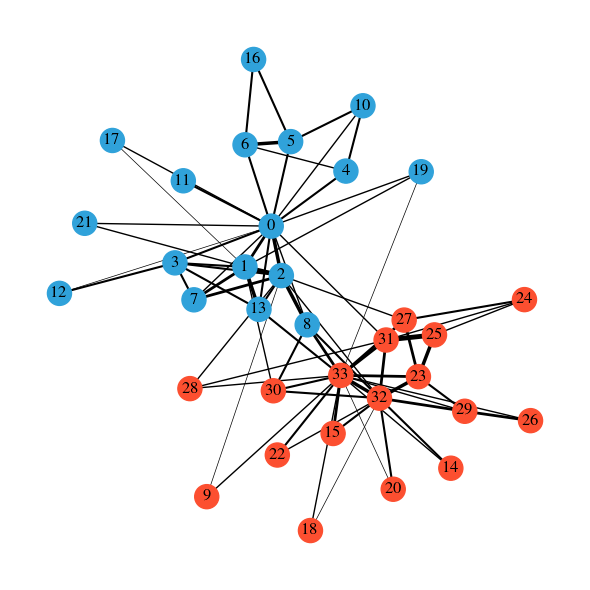

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
nx.draw_networkx(G, pos=pos1_kk, node_color=node_colors, width=edge_weights)
ax.set_axis_off()
plt.tight_layout()

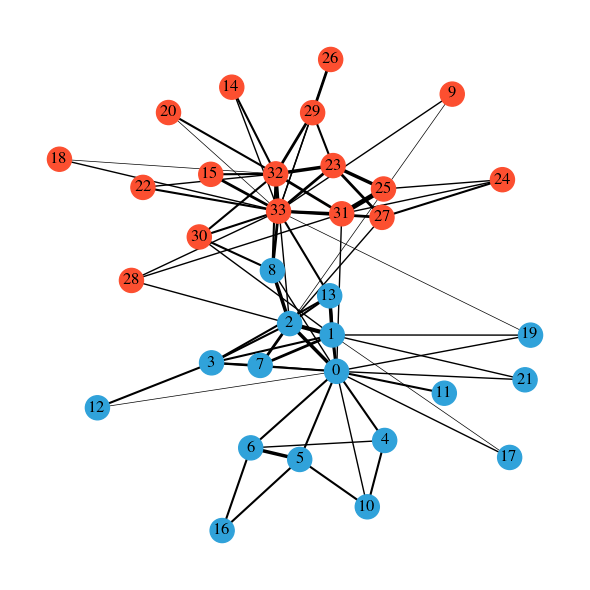

In [19]:
fig, ax = plt.subplots(figsize=(6,6))
nx.draw_networkx(G, pos=pos2_kk, node_color=node_colors, width=edge_weights)
ax.set_axis_off()
plt.tight_layout()

### Fruchterman-Reingold

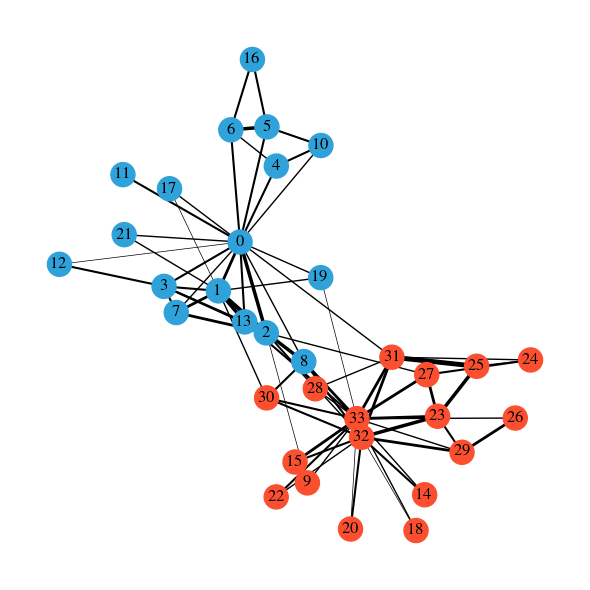

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
nx.draw_networkx(G, pos=pos2, node_color=node_colors, width=edge_weights)
ax.set_axis_off()
plt.tight_layout()
plt.savefig("../figures/graph_karate_fr.pdf", transparent=True, bbox_inches="tight")

#### Random

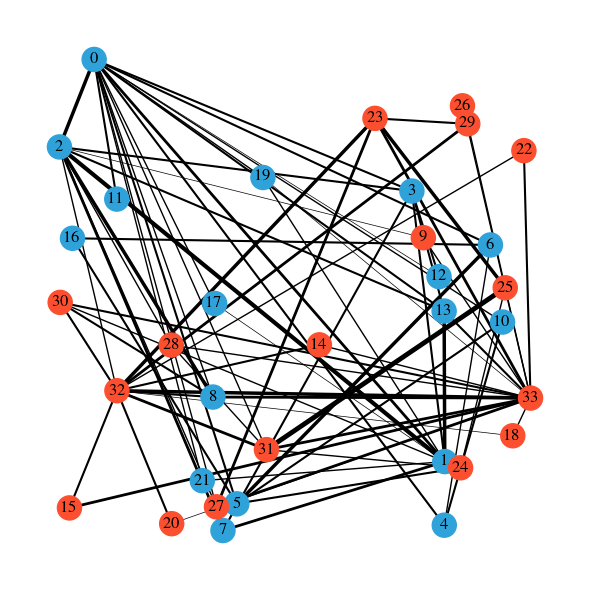

In [21]:
fig, ax = plt.subplots(figsize=(6,6))
nx.draw_networkx(G, pos=pos3, node_color=node_colors, width=edge_weights)
ax.set_axis_off()
plt.tight_layout()
plt.savefig("../figures/graph_karate_random.pdf", transparent=True, bbox_inches="tight")

#### Effects of seeding

In [22]:
np.random.seed(21)
pos_r1 = nx.fruchterman_reingold_layout(G, weight="weight")
np.random.seed(35)
pos_r2 = nx.fruchterman_reingold_layout(G, weight="weight")

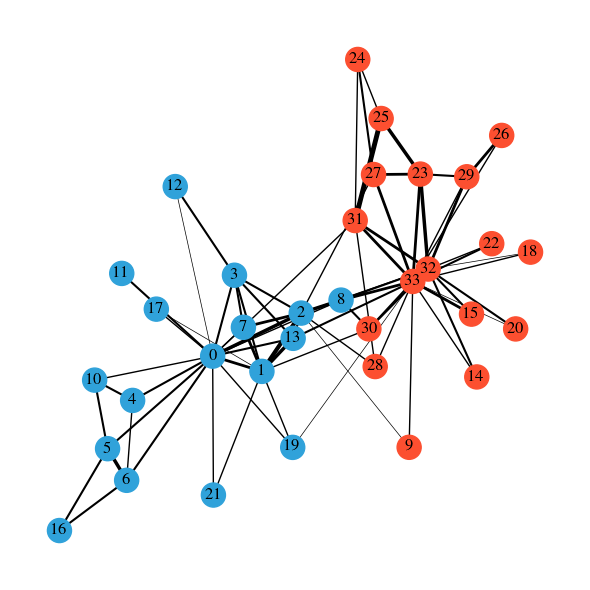

In [23]:
fig, ax = plt.subplots(figsize=(6,6))
nx.draw_networkx(G, pos=pos_r1, node_color=node_colors, width=edge_weights)
ax.set_axis_off()
plt.tight_layout()
plt.savefig("../figures/graph_karate_fr_21.pdf", transparent=True, bbox_inches="tight")

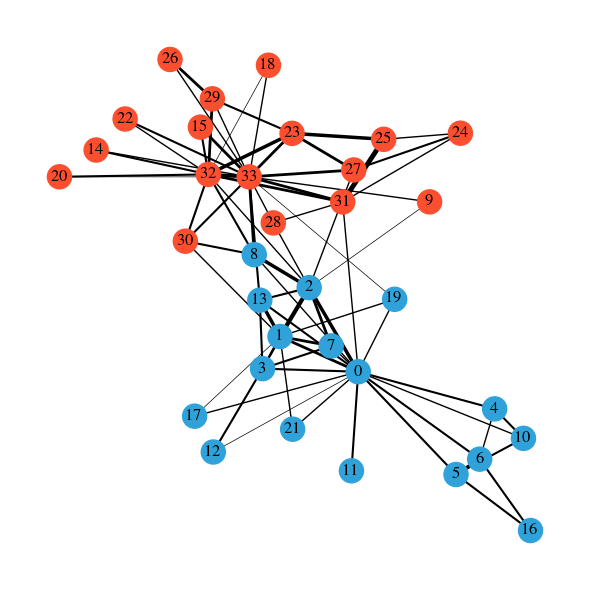

In [24]:
fig, ax = plt.subplots(figsize=(6,6))
nx.draw_networkx(G, pos=pos_r2, node_color=node_colors, width=edge_weights)
ax.set_axis_off()
plt.tight_layout()
plt.savefig("../figures/graph_karate_fr_35.pdf", transparent=True, bbox_inches="tight")

#### Reordering for the radial

In [25]:
G = nx.karate_club_graph()
nodes = [v for v,c in sorted(G.nodes(data="club"), key=lambda tup:tup[-1])]
nx.set_node_attributes(G, {v:v for v in G.nodes}, "label")
nx.set_node_attributes(G, {v:nodes.index(v) for v in G.nodes}, "new_label")
new_nodes = sorted({v["new_label"]:{"club":v["club"],"label":v["label"]} for k,v in G.nodes(data=True)}.items())
new_edges = [(nodes.index(u),nodes.index(v),{"weight":w}) for u,v,w in G.edges(data="weight")]
Gnew = nx.Graph()
Gnew.add_nodes_from(new_nodes)
Gnew.add_edges_from(new_edges)

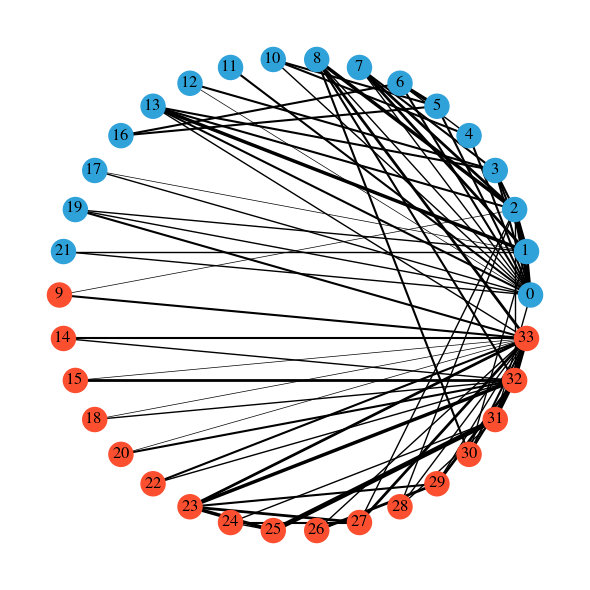

In [26]:
clubs = sorted({v for k,v in Gnew.nodes(data="club")})
node_colors = [cc.glasbey_hv[clubs.index(v)] for _, v in Gnew.nodes(data="club")]

pos4 = nx.circular_layout(Gnew)

fig, ax = plt.subplots(figsize=(6,6))
nx.draw_networkx(Gnew, pos=pos4, node_color=node_colors, width=edge_weights, with_labels=False)
nx.draw_networkx_labels(Gnew, pos=pos4, labels={v:l for v,l in Gnew.nodes(data="label")})
ax.set_axis_off()
plt.tight_layout()
plt.savefig("../figures/graph_karate_circular.pdf", transparent=True, bbox_inches="tight")

#### Adjacency matrix

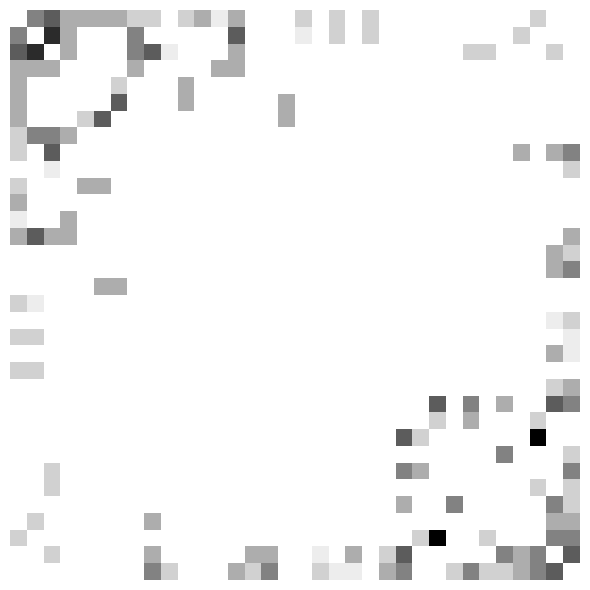

In [27]:
fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(nx.adjacency_matrix(G).todense(), cmap="Grays", cbar=False, square=True, xticklabels=0, yticklabels=0, ax=ax)
plt.tight_layout()
plt.savefig("../figures/graph_karate_adj.pdf", transparent=True, bbox_inches="tight")

#### Deliberately disorganized radial

In [28]:
rng = np.random.default_rng(42)
df = pd.DataFrame(nx.adjacency_matrix(G).todense())
reordered_indices = rng.permutation(df.index)

In [29]:
reordered_colors = [node_colors[idx] for idx in reordered_indices]

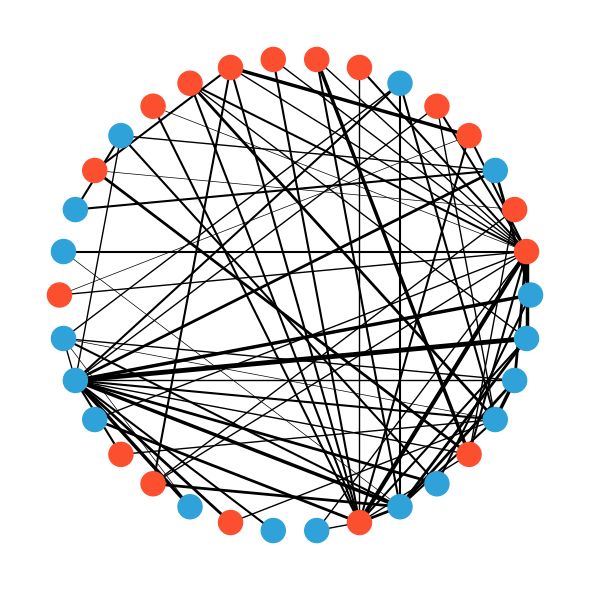

In [30]:
fig, ax = plt.subplots(figsize=(6,6))
rG = nx.Graph(df.loc[reordered_indices,reordered_indices])
rG_edgewidths = [w for u,v,w in rG.edges(data="weight")]
nx.draw_circular(rG, ax=ax, width=edge_weights, node_color=reordered_colors)
ax.set_axis_off()
plt.tight_layout()
plt.savefig("../figures/graph_karate_circular_random-order.pdf", transparent=True, bbox_inches="tight")

#### ...and its organized counterpart

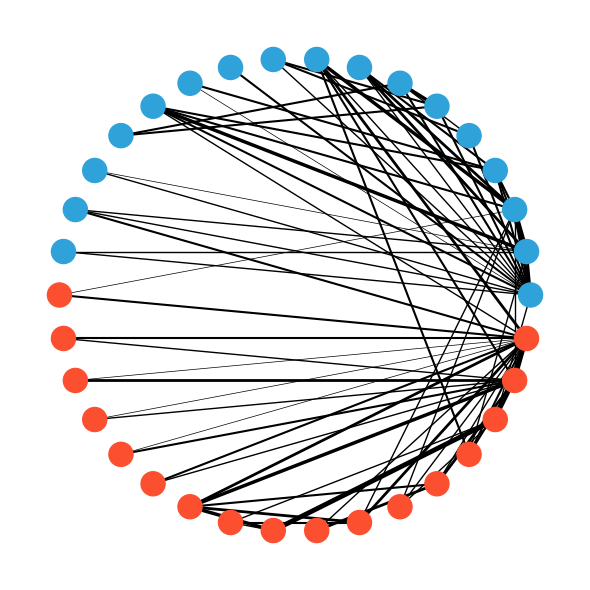

In [31]:
clubs = sorted({v for k,v in Gnew.nodes(data="club")})
node_colors = [cc.glasbey_hv[clubs.index(v)] for _, v in Gnew.nodes(data="club")]

pos4 = nx.circular_layout(Gnew)

fig, ax = plt.subplots(figsize=(6,6))
nx.draw_networkx(Gnew, pos=pos4, node_color=node_colors, width=edge_weights, with_labels=False)
ax.set_axis_off()
plt.tight_layout()
plt.savefig("../figures/graph_karate_circular_no-label.pdf", transparent=True, bbox_inches="tight")

### Bi-partite and multi-partite graphs

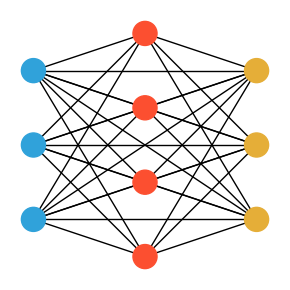

In [32]:
G = nx.complete_multipartite_graph(3, 4, 3)
pos = nx.multipartite_layout(G, subset_key="subset")

fig, ax = plt.subplots(figsize=(3,3))
nx.draw_networkx(G, pos=pos, with_labels=False, node_color=[cc.glasbey_hv[0]] * 3 + [cc.glasbey_hv[1]] * 4 + [cc.glasbey_hv[2]] * 3)
ax.set_axis_off()
plt.tight_layout()
plt.savefig("../figures/graph_multipartite.pdf", transparent=True, bbox_inches="tight")

#### Trees without special layouts

In [33]:
np.random.seed(42)
T = nx.random_unlabeled_tree(40, seed=42)

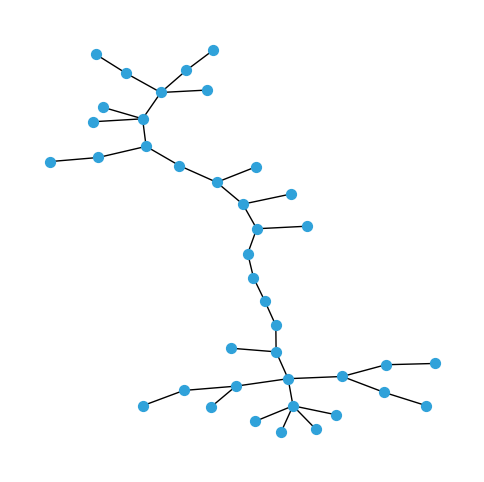

In [34]:
np.random.seed(42)
pos = nx.kamada_kawai_layout(T)
fig, ax = plt.subplots(figsize=(6,6))
nx.draw_networkx(T, pos=pos, node_size=50, with_labels=False, ax=ax, node_color=[cc.glasbey_hv[0]])
ax.set_axis_off()
plt.savefig("../figures/tree_random_kk.pdf", transparent=True, bbox_inches="tight")

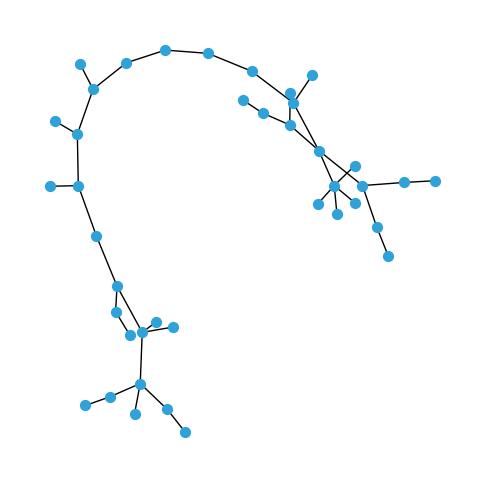

In [35]:
np.random.seed(42)
pos = nx.fruchterman_reingold_layout(T)
fig, ax = plt.subplots(figsize=(6,6))
nx.draw_networkx(T, pos=pos, node_size=50, with_labels=False, ax=ax, node_color=[cc.glasbey_hv[0]])
ax.set_axis_off()
plt.savefig("../figures/tree_random_fr.pdf", transparent=True, bbox_inches="tight")

## Using igraph (C under the hood)

In [36]:
import igraph as ig
import random
random.seed(42) # igraph uses the default rng under the hood

In [37]:
g = ig.Graph(edges=[[0, 1], [1,2], [2, 3], [3,0]])

In [38]:
layout = g.layout(layout='kamada_kawai')

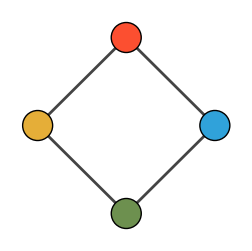

In [39]:
fig, ax = plt.subplots(figsize=(3,3))
ig.plot(g, target=ax, layout=layout, vertex_color=cc.glasbey_hv[:4])
plt.savefig("../figures/graph_four-cycle.pdf", transparent=True, bbox_inches="tight")

In [40]:
g = ig.Graph.Tree(40, 3)
colors = [cc.glasbey_hv[0]] + [cc.glasbey_hv[1]] * 3  + [cc.glasbey_hv[2]] * 9 + [cc.glasbey_hv[3]] * 27
layout = g.layout(layout="rt_circular", root=[0])
layout2 = g.layout(layout="rt", root=[0])
layout3 = [list(reversed(x)) for x in layout2.coords]

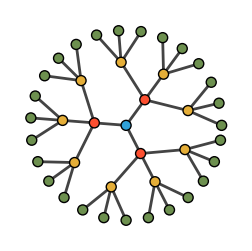

In [41]:
fig, ax = plt.subplots(figsize=(3,3))

ig.plot(g, layout=layout, center=0, target=ax, vertex_color=colors, vertex_size=10)
plt.savefig("../figures/tree_radial.pdf", transparent=True, bbox_inches="tight")

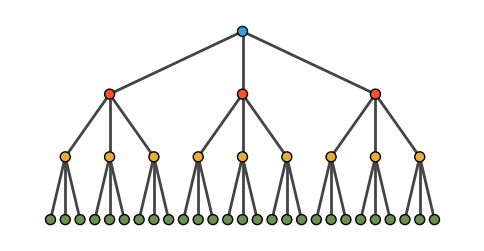

In [42]:
fig, ax = plt.subplots(figsize=(6,3))

ig.plot(g, layout=layout2, center=0, target=ax, vertex_color=colors, vertex_size=10)
ax.invert_yaxis()
plt.savefig("../figures/tree_hierarchical.pdf", transparent=True, bbox_inches="tight")

## graph-tool
See [here](https://graph-tool.skewed.de/).
This is a great alternative, especially for large-scale network visualization and visualizing network models.  
However, installing via `uv` is not currently supported. 